In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection

#Importing necessary libraries

In [65]:
df=pd.read_csv("D:/Data/Spring23/AppliedML-JP/MEAP93.csv")
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.6,5765,37498,7420,2.9,89.2,56.4,67.9,44918,10.71259,8.659560,7.529407,4.723842,0.197877,10.53204
1,2.3,11355,101.2,6601,48722,10370,1.3,91.4,42.7,65.3,59092,10.98685,8.794976,9.337414,4.617099,0.212840,10.79389
2,2.7,7685,114.0,6834,44541,7313,3.5,91.4,43.8,54.3,51854,10.85619,8.829665,8.947025,4.736198,0.164186,10.70417
3,3.4,1148,85.4,3586,31566,5989,3.6,86.6,25.3,60.0,37555,10.53356,8.184793,7.045776,4.447346,0.189729,10.35984
4,3.4,1572,96.1,3847,29781,5545,0.0,100.0,15.3,65.8,35326,10.47237,8.255049,7.360104,4.565389,0.186193,10.30163


Checking null values

In [66]:
df.isnull().sum()


lnchprg     0
enroll      0
staff       0
expend      0
salary      0
benefits    0
droprate    0
gradrate    0
math10      0
sci11       0
totcomp     0
ltotcomp    0
lexpend     0
lenroll     0
lstaff      0
bensal      0
lsalary     0
dtype: int64

In [67]:
df.keys()

Index(['lnchprg', 'enroll', 'staff', 'expend', 'salary', 'benefits',
       'droprate', 'gradrate', 'math10', 'sci11', 'totcomp', 'ltotcomp',
       'lexpend', 'lenroll', 'lstaff', 'bensal', 'lsalary'],
      dtype='object')

Plotting the enroll column to check skewness/outlier

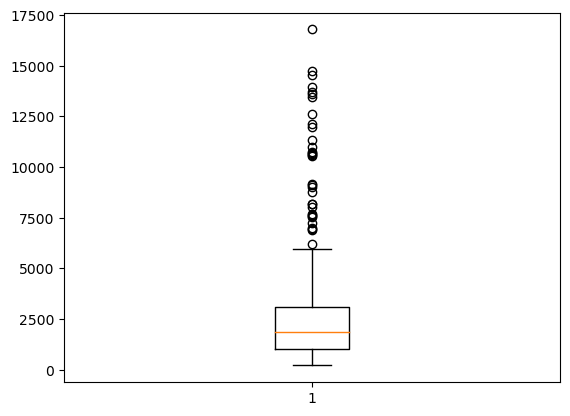

In [68]:
plt.boxplot(df.enroll)
plt.show()

Removing outliers

In [69]:
iqr=df.enroll.quantile(0.75)+(1.5*(df.enroll.quantile(0.75)-df.enroll.quantile(0.25)))
df=df[df.enroll<iqr]
df=df[df.enroll<6155.625]

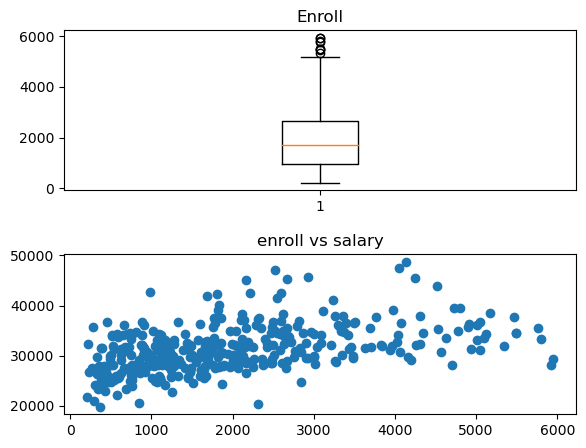

In [70]:
plt.subplot(2,1,1)
plt.boxplot(df.enroll)
plt.title('Enroll')

plt.subplot(2,1,2)
plt.scatter(df.enroll,df.salary)
plt.title('enroll vs salary')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [71]:
df.corr()
df.corr()['enroll'].sort_values(ascending=False)

enroll      1.000000
lenroll     0.925021
lsalary     0.461261
ltotcomp    0.458246
salary      0.452796
totcomp     0.448147
benefits    0.262687
lexpend     0.169462
expend      0.160362
sci11       0.133167
math10      0.100386
droprate    0.046991
gradrate    0.005822
bensal     -0.054876
staff      -0.242285
lstaff     -0.242553
lnchprg    -0.341496
Name: enroll, dtype: float64

# OLS regression 

In [72]:
X=df.drop(['enroll'],axis=1)
Y=df['enroll']
X=sm.add_constant(X)
mod = sm.OLS(Y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 enroll   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          9.15e-156
Time:                        23:39:03   Log-Likelihood:                -2824.3
No. Observations:                 375   AIC:                             5681.
Df Residuals:                     359   BIC:                             5743.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.077e+04   1.87e+04     -0.577      0.5

# linear regression model using stats model

In [73]:
import statsmodels.formula.api as smf
mod = smf.ols('enroll~lnchprg+staff+salary+math10+sci11+totcomp+ltotcomp+lenroll+lexpend+lstaff+bensal+lsalary',df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 enroll   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     212.9
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          8.37e-156
Time:                        23:39:03   Log-Likelihood:                -2832.5
No. Observations:                 375   AIC:                             5691.
Df Residuals:                     362   BIC:                             5742.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.895e+04   1.74e+04      1.090      0.276   -1.52e+04    5.31e+04
lnchprg        2.3469      2.391      0.981      0.327      -2.356       7.050
staff         44.6681     17.496      2.553      0.011      10.262      79.074
salary         0.0082      0.162      0.051      0.960      -0.310       0.326
math10         8.4548      2.673      3.163      0.002       3.198      13.712
sci11          1.1332      2.151      0.527      0.599      -3.098       5.364
totcomp        0.0664      0.139      0.477      0.634      -0.207       0.340
ltotcomp   -1.165e+04   1.82e+04     -0.642      0.522   -4.74e+04    2.41e+04
lenroll     1722.5486     41.822     41.187      0.000    1640.303    1804.794
lexpend    -1100.7331    842.876     -1.306      0.192   -2758.281     556.815
lstaff     -2441.6320   1936.882     -1.261      0.208   -6250.586    1367.322
bensal      8745.5799   1.26e+04      0.697      0.486   -1.59e+04    3.34e+04
lsalary     1.007e+04   1.81e+04      0.555      0.579   -2.56e+04    4.57e+04
==============================================================================
Omnibus:                       74.468   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.086
Skew:                           1.224   Prob(JB):                     3.76e-26
Kurtosis:                       4.225   Cond. No.                     5.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
mod = smf.ols('enroll~ltotcomp+lexpend+lstaff+lnchprg',df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 enroll   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     36.87
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           6.01e-26
Time:                        23:39:03   Log-Likelihood:                -3160.9
No. Observations:                 375   AIC:                             6332.
Df Residuals:                     370   BIC:                             6351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.885e+04   1.33e+04     -5.911      0.000   -1.05e+05   -5.26e+04
ltotcomp    1.107e+04   1882.628      5.881      0.000    7369.882    1.48e+04
lexpend    -8184.6971   1910.466     -4.284      0.000   -1.19e+04   -4427.964
lstaff      7194.1846   1943.368      3.702      0.000    3372.753     1.1e+04
lnchprg      -16.5349      4.749     -3.482      0.001     -25.873      -7.197
==============================================================================
Omnibus:                       48.615   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.287
Skew:                           0.898   Prob(JB):                     4.04e-15
Kurtosis:                       4.010   Cond. No.                     7.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
X=df.drop(['enroll'],axis=1)
Y=df['enroll']

reg0 = LinearRegression().fit(X, Y)
print(reg0.score(X, Y),reg0.intercept_,reg0.coef_)


0.881278023641386 -10774.072161952527 [ 2.89253882e+00  7.08681089e+01 -1.43478452e+00  5.68970053e-02
  1.70274844e-03  8.76313662e+00  2.33713030e+00  8.96308421e+00
  1.53152010e+00  5.85993628e-02 -7.78223071e+03  5.27965502e+03
  1.72721552e+03 -4.83296588e+03  5.74775550e+03  5.16201962e+03]


In [76]:
reg0.predict(X)

array([ 2590.24220561,  1184.47694013,  1753.09959556,  2929.3275955 ,
        3365.18198806,  3594.62318591,  4632.60433934,  1079.63138589,
        1678.69682667,  3592.99066027,  4110.84769229,  3386.78675439,
        2658.34554774,  2493.70687507,  2008.19975999,  3409.7201525 ,
        2226.91416804,  2821.09891708,   763.41172134,  2716.48447963,
        1326.24913309,  3034.50706006,  4183.1176482 ,  3060.14388028,
        4301.40981384,  2498.16226866,  3967.92516258,  3051.63156495,
        3021.47382826,  1396.77737988,   975.16485067,   988.19513125,
        4137.95283462,  3248.26095479,  -222.40986344,  5000.43341118,
        2494.28886705,   710.9910876 ,  2062.95704839,  3051.04206983,
        2693.51876523,  1469.68701884,  2839.9796242 ,  1978.24395866,
        3421.44632292,  4230.59038431,  3626.46860544,  3931.86290141,
         516.8017978 ,  4041.52486254,  3202.47286616,   244.95092353,
        2258.68460938,  3125.47306776,  3157.15508871,  2738.75446242,
      

In [77]:
selector = RFE(LinearRegression(), n_features_to_select=3, step=1)
selector = selector.fit(X, Y)

In [78]:
print(selector.support_,selector.ranking_,selector.score(X,Y))

[False False False False False False False False False False  True False
 False False  True  True] [ 9  5 11 13 14  7  8  6 10 12  1  4  2  3  1  1] 0.21494911259675453


# KNeighborsRegressor

In [79]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X,Y)

KNeighborsRegressor(n_neighbors=2)

In [80]:
neigh.score(X,Y)

0.5861255105874228

computing the coefficient of determination R^2 of the KNeighborsRegressor

In [81]:
models = [KNeighborsRegressor(n_neighbors=i) for i in range(1,10)]
[model.fit(X,Y).score(X,Y) for model in models]

[1.0,
 0.5861255105874228,
 0.4514655162081165,
 0.3775771010324743,
 0.35309388365590866,
 0.3240841982437046,
 0.29307519398154513,
 0.29436653642981236,
 0.29471091845807973]


Lasso regression 

In [82]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, Y)

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e+07, tolerance: 6.437e+04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

 computing the coefficients, the intercept, and the sum of absolute values of coefficients of the fitted Lasso model

In [83]:
clf.coef_

array([ 3.08291094e+00,  6.33927554e+01, -1.28036473e+00,  1.17316379e-01,
        5.14603963e-02,  8.86380104e+00,  2.49336624e+00,  8.77168786e+00,
        1.48063232e+00, -9.69502494e-03, -0.00000000e+00,  4.29495002e+03,
        1.71987114e+03, -3.78422870e+03,  0.00000000e+00, -1.94926668e+03])

In [84]:
clf.intercept_

-14085.318621442679

In [85]:
np.abs(clf.coef_).sum()

11837.860529836924

# LinearRegression

In [86]:
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [87]:
lm.coef_

array([ 2.89253882e+00,  7.08681089e+01, -1.43478452e+00,  5.68970053e-02,
        1.70274844e-03,  8.76313662e+00,  2.33713030e+00,  8.96308421e+00,
        1.53152010e+00,  5.85993628e-02, -7.78223071e+03,  5.27965502e+03,
        1.72721552e+03, -4.83296588e+03,  5.74775550e+03,  5.16201962e+03])

In [88]:
lm.intercept_

-10774.072161952527

In [89]:
np.abs(lm.coef_).sum()

30628.749760545295

In [90]:
lm.predict(X)

array([ 2590.24220561,  1184.47694013,  1753.09959556,  2929.3275955 ,
        3365.18198806,  3594.62318591,  4632.60433934,  1079.63138589,
        1678.69682667,  3592.99066027,  4110.84769229,  3386.78675439,
        2658.34554774,  2493.70687507,  2008.19975999,  3409.7201525 ,
        2226.91416804,  2821.09891708,   763.41172134,  2716.48447963,
        1326.24913309,  3034.50706006,  4183.1176482 ,  3060.14388028,
        4301.40981384,  2498.16226866,  3967.92516258,  3051.63156495,
        3021.47382826,  1396.77737988,   975.16485067,   988.19513125,
        4137.95283462,  3248.26095479,  -222.40986344,  5000.43341118,
        2494.28886705,   710.9910876 ,  2062.95704839,  3051.04206983,
        2693.51876523,  1469.68701884,  2839.9796242 ,  1978.24395866,
        3421.44632292,  4230.59038431,  3626.46860544,  3931.86290141,
         516.8017978 ,  4041.52486254,  3202.47286616,   244.95092353,
        2258.68460938,  3125.47306776,  3157.15508871,  2738.75446242,
      

In [91]:
lm.predict(X).mean()

1995.922666666675

# LassoCV

In [92]:
clf = linear_model.LassoCV()
clf.fit(X,Y)

LassoCV()

attributes of the fitted LassoCV model, including the coefficients, intercept, and mean squared error (MSE) values

In [93]:
clf.coef_

array([-0.        ,  0.        , -0.31861687,  0.08691023,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.0592675 ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [94]:
clf.intercept_

-1584.2980312754437

In [95]:
clf.mse_path_

array([[2511667.54351111, 1965830.65482582, 1353802.22598546,
        1749484.37592009, 1546967.02844444],
       [2511667.54351111, 1931024.89539638, 1324345.84836257,
        1706854.14006896, 1546967.02844444],
       [2511667.54351111, 1900669.05195808, 1298192.12714086,
        1669768.11181465, 1491483.05724941],
       [2446963.10382535, 1874189.15077824, 1274946.88230203,
        1637504.7202795 , 1432681.96432712],
       [2373339.27876548, 1851085.59917963, 1254264.85027484,
        1609436.34165188, 1381128.91752481],
       [2309144.61807175, 1830923.5229173 , 1235843.47601621,
        1585017.06506569, 1335907.54185014],
       [2253161.77493169, 1813324.36039742, 1219417.50266077,
        1563772.05181261, 1296218.95483771],
       [2204331.23452724, 1797958.5501496 , 1204754.25559743,
        1545288.28036537, 1261366.58880795],
       [2161730.80536804, 1784539.16926339, 1191649.53121584,
        1529206.49671991, 1230742.98156479],
       [2124557.77858937, 1772816.399

In [96]:
clf.mse_path_.mean(1)

array([1825550.36573738, 1804171.89115669, 1774355.97833482,
       1733257.16430245, 1693850.99747933, 1659367.24478422,
       1629178.92892804, 1602739.78188952, 1579573.7968264 ,
       1559266.1365221 , 1541455.22197009, 1525825.84765454,
       1512103.19005337, 1500047.5932578 , 1489450.03070935,
       1480128.15519561, 1471922.86067595, 1464695.28945007,
       1458324.22683051, 1452703.83300238, 1447741.66829675,
       1443527.30143401, 1439926.78205147, 1436758.43803152,
       1433968.43888452, 1431385.08217778, 1429109.37465984,
       1427004.40485081, 1424877.10472349, 1422737.59563683,
       1420872.60822079, 1419247.01749622, 1417829.22022217,
       1416593.23613724, 1415514.88842008, 1414573.64103674,
       1413752.8200643 , 1413036.12209687, 1412410.47237043,
       1411864.1739393 , 1411386.77903828, 1410970.04624676,
       1410605.23142635, 1410009.54289827, 1409413.97739316,
       1408877.66900211, 1408393.14055529, 1407955.6956627 ,
       1407559.97188833,

In [97]:
clf.mse_path_.mean(1).argmin()

98

In [98]:
clf.alpha_

3500.2293884010005

In [99]:
clf.alphas_[clf.mse_path_.mean(1).argmin()]

3500.2293884010005

In [100]:
clf.predict(X)

array([2500.01309211, 2242.34116053, 1871.94013965, 2529.18299632,
       2935.89833387, 2576.98583822, 1671.62235558, 3312.30009057,
       2205.20152234, 1715.28718562, 3651.10140253, 2503.83228953,
       2330.81293721, 2952.6258257 , 1793.08192296, 2687.84651762,
       1949.20139782, 2673.57930823, 2416.20802449, 2387.50757518,
       1190.97472403, 3437.36985726, 2214.37503905, 2923.05051976,
       2455.08849627, 2323.34506772, 3026.49538708, 2284.26990975,
       2040.37255164, 1691.11494857, 2013.40727581, 2412.44998955,
       2323.96470732, 1716.19607686, 1207.3635814 , 1531.01135943,
       2652.5267455 , 2351.04767916, 2895.98708852, 3858.91391904,
       2293.93627406, 1324.66463543, 1919.19508526, 1432.91028705,
       2554.51663356, 4495.14709571, 2914.13531684, 2553.2481272 ,
       2498.86372849, 4042.43416144, 3007.33730904, 2269.52597514,
       3058.76552116, 1807.6296532 , 3163.80977742, 2431.50112606,
       2047.93750727, 2820.68733657, 2591.81481677, 2889.96760

In [101]:
print(clf.predict(X).mean(),lm.predict(X).mean(),clf.predict(X).var(),lm.predict(X).var())

1995.9226666666666 1995.922666666675 384871.87185157125 1512659.4144329024


the optimal value of alpha that balances model complexity

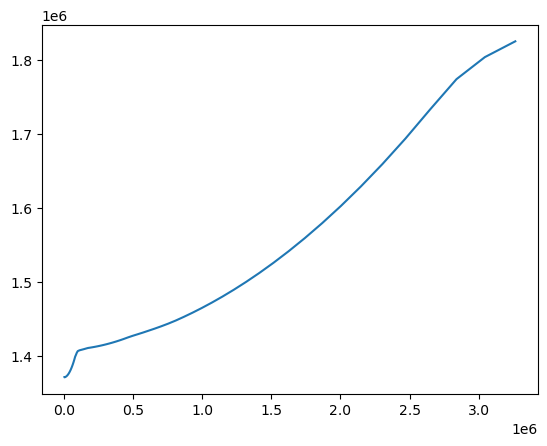

In [102]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [103]:
clf = linear_model.LassoCV(alphas=np.linspace(0.00001,0.01,200))
clf.fit(X,Y)

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29361406.33634532, tolerance: 46549.49033466667
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29321851.08685166, tolerance: 46549.49033466667
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29308629.833465826, tolerance: 46549.49033466667
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2311834.4941887856, tolerance: 49730.56953200001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2310576.947180994, tolerance: 49730.56953200001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2309367.267270297, tolerance: 49730.56953200001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116433.820845917, tolerance: 49730.56953200001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2112031.1953697354, tolerance: 49730.56953200001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2107408.8958069533, tolerance: 49730.56953200001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4977217.525364399, tolerance: 54004.88644366668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4989696.416195884, tolerance: 54004.88644366668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5002482.482578978, tolerance: 54004.88644366668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32327149.589832097, tolerance: 54004.88644366668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32331318.217633035, tolerance: 54004.88644366668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32335395.0591642, tolerance: 54004.88644366668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30438068.778728433, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30395790.26282444, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30371479.41246905, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10121840.351059034, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10172194.966028944, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10223122.248520873, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWar

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30218762.287900433, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30226443.605300065, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30233544.377743464, tolerance: 51384.435417
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWar

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25853901.294555303, tolerance: 53760.65406666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25853959.496983197, tolerance: 53760.65406666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25854154.34418489, tolerance: 53760.65406666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26000377.159020487, tolerance: 53760.65406666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26001959.645673804, tolerance: 53760.65406666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26003538.740926042, tolerance: 53760.65406666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

LassoCV(alphas=array([1.00000000e-05, 6.02010050e-05, 1.10402010e-04, 1.60603015e-04,
       2.10804020e-04, 2.61005025e-04, 3.11206030e-04, 3.61407035e-04,
       4.11608040e-04, 4.61809045e-04, 5.12010050e-04, 5.62211055e-04,
       6.12412060e-04, 6.62613065e-04, 7.12814070e-04, 7.63015075e-04,
       8.13216080e-04, 8.63417085e-04, 9.13618090e-04, 9.63819095e-04,
       1.01402010e-03, 1.06422111e-0...
       8.84537688e-03, 8.89557789e-03, 8.94577889e-03, 8.99597990e-03,
       9.04618090e-03, 9.09638191e-03, 9.14658291e-03, 9.19678392e-03,
       9.24698492e-03, 9.29718593e-03, 9.34738693e-03, 9.39758794e-03,
       9.44778894e-03, 9.49798995e-03, 9.54819095e-03, 9.59839196e-03,
       9.64859296e-03, 9.69879397e-03, 9.74899497e-03, 9.79919598e-03,
       9.84939698e-03, 9.89959799e-03, 9.94979899e-03, 1.00000000e-02]))

# plot of mean cross-validated mean squared error (MSE) values for different values of the regularization parameter alpha

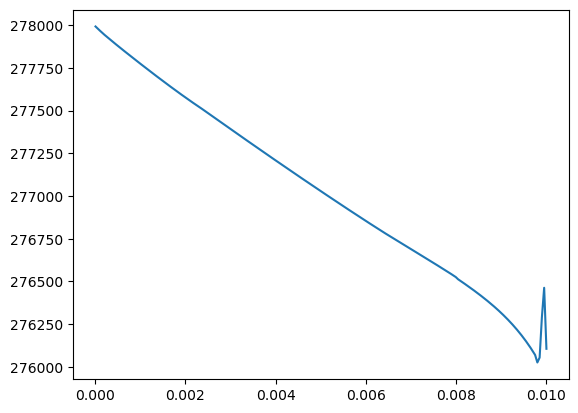

In [104]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [105]:
print(clf.alpha_,clf.coef_,lm.coef_)

0.009799195979899497 [ 2.94529163e+00  7.08813007e+01 -1.44991726e+00  1.31397614e-01
 -4.36235317e-03  8.84509440e+00  2.46333252e+00  8.75047932e+00
  1.49169216e+00 -3.32360432e-03  4.10560927e+03  5.32391294e+03
  1.72543804e+03 -4.80874439e+03 -2.06364648e+03 -6.63870578e+03] [ 2.89253882e+00  7.08681089e+01 -1.43478452e+00  5.68970053e-02
  1.70274844e-03  8.76313662e+00  2.33713030e+00  8.96308421e+00
  1.53152010e+00  5.85993628e-02 -7.78223071e+03  5.27965502e+03
  1.72721552e+03 -4.83296588e+03  5.74775550e+03  5.16201962e+03]


In [106]:
clf.coef_

array([ 2.94529163e+00,  7.08813007e+01, -1.44991726e+00,  1.31397614e-01,
       -4.36235317e-03,  8.84509440e+00,  2.46333252e+00,  8.75047932e+00,
        1.49169216e+00, -3.32360432e-03,  4.10560927e+03,  5.32391294e+03,
        1.72543804e+03, -4.80874439e+03, -2.06364648e+03, -6.63870578e+03])

Ridge regression model

In [107]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X,Y)

Ridge()

In [108]:
print(clf.coef_,clf.intercept_,lm.coef_,lm.intercept_)

[ 3.09126956e+00  3.67729959e+01 -5.96341674e-01  2.92112524e-02
  1.88354287e-02  9.42604114e+00  2.69134064e+00  8.36349104e+00
  1.19696698e+00  4.80444193e-02 -6.50904276e+01  2.09513381e+02
  1.68727963e+03 -1.45533388e+02  4.94711126e+01 -9.33631347e+01] -14446.049611096618 [ 2.89253882e+00  7.08681089e+01 -1.43478452e+00  5.68970053e-02
  1.70274844e-03  8.76313662e+00  2.33713030e+00  8.96308421e+00
  1.53152010e+00  5.85993628e-02 -7.78223071e+03  5.27965502e+03
  1.72721552e+03 -4.83296588e+03  5.74775550e+03  5.16201962e+03] -10774.072161952527


In [109]:
clf.predict(X)

array([ 2634.79735251,  1268.31315813,  1801.12290347,  2865.37548403,
        3275.2400504 ,  3578.20263493,  4629.81562834,  1198.54439048,
        1684.4889714 ,  3481.97225986,  3921.82847438,  3480.76089257,
        2652.96910901,  2358.62348431,  1960.16304477,  3273.97246343,
        2188.35033202,  2718.09751832,   815.00852726,  2682.5524695 ,
        1299.13509319,  2931.33605038,  4133.19345232,  3008.37644632,
        4281.18162538,  2662.78542429,  3926.22455233,  3037.87868374,
        2998.96082283,  1452.96671708,   997.73054537,  1007.49651702,
        4105.66646064,  3263.39381682,  -310.92133872,  4978.72393786,
        2519.36927031,   677.27490169,  1984.20735742,  3032.89704487,
        2725.53667666,  1481.01335853,  2882.59625443,  1959.96537972,
        3360.80219771,  4054.90048664,  3626.61749772,  3915.61780234,
         459.48320498,  3888.15078532,  3104.36959375,   313.98848299,
        2234.86718812,  3113.73054563,  3140.52385206,  2816.30686483,
      

the mean and variance of the predicted target variable values of Linear and Ridge regression

In [110]:
print(clf.predict(X).mean(),lm.predict(X).mean(),clf.predict(X).var(),lm.predict(X).var())

1995.922666666669 1995.922666666675 1491420.8371839193 1512659.4144329024


In [111]:
clf = linear_model.RidgeCV(alphas=np.linspace(0.1,500,1000),store_cv_values=True,cv=None)
clf.fit(X,Y)

RidgeCV(alphas=array([1.00000000e-01, 6.00400400e-01, 1.10080080e+00, 1.60120120e+00,
       2.10160160e+00, 2.60200200e+00, 3.10240240e+00, 3.60280280e+00,
       4.10320320e+00, 4.60360360e+00, 5.10400400e+00, 5.60440440e+00,
       6.10480480e+00, 6.60520521e+00, 7.10560561e+00, 7.60600601e+00,
       8.10640641e+00, 8.60680681e+00, 9.10720721e+00, 9.60760761e+00,
       1.01080080e+01, 1.06084084e+0...
       4.88490791e+02, 4.88991191e+02, 4.89491592e+02, 4.89991992e+02,
       4.90492392e+02, 4.90992793e+02, 4.91493193e+02, 4.91993594e+02,
       4.92493994e+02, 4.92994394e+02, 4.93494795e+02, 4.93995195e+02,
       4.94495596e+02, 4.94995996e+02, 4.95496396e+02, 4.95996797e+02,
       4.96497197e+02, 4.96997598e+02, 4.97497998e+02, 4.97998398e+02,
       4.98498799e+02, 4.98999199e+02, 4.99499600e+02, 5.00000000e+02]),
        store_cv_values=True)

In [112]:
print(clf.intercept_,clf.alpha_,lm.intercept_)

-12702.078896785964 0.1 -10774.072161952527


In [113]:
clf.coef_

array([ 3.18106876e+00,  4.39891909e+01, -8.12556222e-01,  4.29354310e-02,
        7.14322552e-03,  9.13552369e+00,  2.63487973e+00,  8.62583868e+00,
        1.28848502e+00,  5.00786304e-02, -3.93932440e+02,  1.54831037e+03,
        1.70595858e+03, -1.21128344e+03,  3.46152847e+02, -5.76446823e+02])

In [114]:
lm.coef_

array([ 2.89253882e+00,  7.08681089e+01, -1.43478452e+00,  5.68970053e-02,
        1.70274844e-03,  8.76313662e+00,  2.33713030e+00,  8.96308421e+00,
        1.53152010e+00,  5.85993628e-02, -7.78223071e+03,  5.27965502e+03,
        1.72721552e+03, -4.83296588e+03,  5.74775550e+03,  5.16201962e+03])

In [115]:
clf.predict(X)

array([ 2627.03751135,  1236.65476254,  1785.92012081,  2888.33970128,
        3301.92492996,  3589.04283978,  4631.57113723,  1162.38344972,
        1682.09983264,  3519.01630327,  3989.90682584,  3463.64314409,
        2657.42123203,  2389.21881542,  1969.51299011,  3311.27454947,
        2198.62799755,  2744.77319299,   794.64255798,  2692.85819138,
        1307.89258392,  2960.0585074 ,  4154.85999375,  3007.77387105,
        4293.17060256,  2620.91022428,  3944.15789201,  3045.01118349,
        3010.03190329,  1436.4303637 ,   985.95648082,   995.64719251,
        4122.05621148,  3265.24228466,  -295.4089831 ,  4990.78206811,
        2512.83578064,   662.31892478,  1995.3131657 ,  3041.55693464,
        2716.95894985,  1465.27023102,  2872.05584776,  1967.60422594,
        3377.20706384,  4106.24998787,  3627.1113419 ,  3924.42521782,
         464.3474407 ,  3932.14244957,  3121.39056636,   286.87532591,
        2243.5758993 ,  3116.76812493,  3150.21878263,  2793.92823642,
      

In [116]:
clf.predict(X).mean(),lm.predict(X).mean(),clf.predict(X).var(),lm.predict(X).var()

(1995.9226666666666, 1995.922666666675, 1505731.7361623805, 1512659.4144329024)

 the mean cross-validation error across different values of alpha for a Ridge regression model

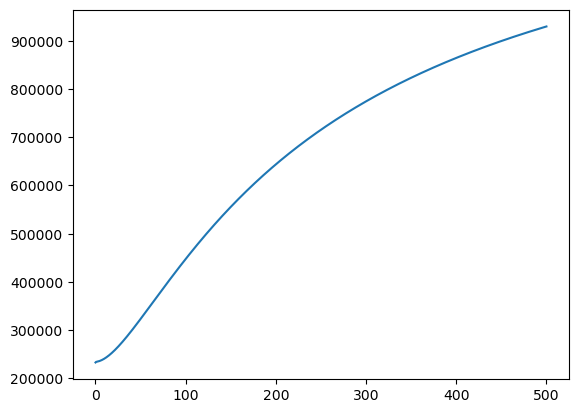

In [117]:
plt.plot(np.linspace(0.1,500,1000),clf.cv_values_.mean(0))

In [118]:
clf = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)
clf.fit(X, y)

NameError: name 'y' is not defined

In [ ]:
clf.coef_

In [ ]:
lm.coef_

In [ ]:
print(clf.intercept_,lm.intercept_)